# 双均线

均线：对于每一个交易日，都可以计算出前N天的移动平均值，然后把这些移动平均值连起来，成为一条线，就叫做N日移动平均线。

移动平均线常用线有5天、10天、30天、60天、120天和240天的指标。

    2天和10天是短线操作的参照指标，称做日均线指标
    
    30天和60天是中期均线指标，称作季均线指标
    
    120天和240天是长期均线指标，称作年均线指标

金叉：短期均线上穿长期均线，买入信号

死叉：短期均线下穿长期均线，卖出信号

In [1]:
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

In [2]:
df = ts.get_k_data("600519", start='2000-1-1').to_csv("600519.csv")

In [3]:
df = pd.read_csv("600519.csv", index_col='date', parse_dates=['date'])[['open', 'close', 'high', 'low']]

In [4]:
df

,open,close,high,low
date,,,,
2001-08-27,5.392,5.554,5.902,5.132
2001-08-28,5.467,5.759,5.781,5.407
2001-08-29,5.777,5.684,5.781,5.640
2001-08-30,5.668,5.796,5.860,5.624
2001-08-31,5.804,5.782,5.877,5.749
...,...,...,...,...
2020-01-13,1112.500,1124.270,1129.200,1112.000
2020-01-14,1124.200,1107.400,1124.890,1103.000
2020-01-15,1109.010,1112.130,1121.600,1105.000


In [5]:
df['ma5'] = np.nan
df['ma30'] = np.nan
df

,open,close,high,low,ma5,ma30
date,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,NaN,NaN
2001-08-28,5.467,5.759,5.781,5.407,NaN,NaN
2001-08-29,5.777,5.684,5.781,5.640,NaN,NaN
2001-08-30,5.668,5.796,5.860,5.624,NaN,NaN
2001-08-31,5.804,5.782,5.877,5.749,NaN,NaN
...,...,...,...,...,...,...
2020-01-13,1112.500,1124.270,1129.200,1112.000,NaN,NaN
2020-01-14,1124.200,1107.400,1124.890,1103.000,NaN,NaN
2020-01-15,1109.010,1112.130,1121.600,1105.000,NaN,NaN


In [6]:
# for i in range(4, len(df)):
#     df.loc[df.index[i], 'ma5'] = df['close'][i - 4 : i + 1].mean()

df['ma5'] = df['open'].rolling(5).mean()

In [7]:
df

,open,close,high,low,ma5,ma30
date,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,NaN,NaN
2001-08-28,5.467,5.759,5.781,5.407,NaN,NaN
2001-08-29,5.777,5.684,5.781,5.640,NaN,NaN
2001-08-30,5.668,5.796,5.860,5.624,NaN,NaN
2001-08-31,5.804,5.782,5.877,5.749,5.715,NaN
...,...,...,...,...,...,...
2020-01-13,1112.500,1124.270,1129.200,1112.000,1104.428,NaN
2020-01-14,1124.200,1107.400,1124.890,1103.000,1107.002,NaN
2020-01-15,1109.010,1112.130,1121.600,1105.000,1111.800,NaN


In [8]:
# for i in range(29, len(df)):
#     df.loc[df.index[i], 'ma5'] = df['close'][i - 29 : i + 1].mean()

df['ma30'] = df['open'].rolling(30).mean()

In [9]:
df

,open,close,high,low,ma5,ma30
date,,,,,,
2001-08-27,5.392,5.554,5.902,5.132,NaN,NaN
2001-08-28,5.467,5.759,5.781,5.407,NaN,NaN
2001-08-29,5.777,5.684,5.781,5.640,NaN,NaN
2001-08-30,5.668,5.796,5.860,5.624,NaN,NaN
2001-08-31,5.804,5.782,5.877,5.749,5.715,NaN
...,...,...,...,...,...,...
2020-01-13,1112.500,1124.270,1129.200,1112.000,1104.428,1138.380000
2020-01-14,1124.200,1107.400,1124.890,1103.000,1107.002,1137.526667
2020-01-15,1109.010,1112.130,1121.600,1105.000,1111.800,1137.331000


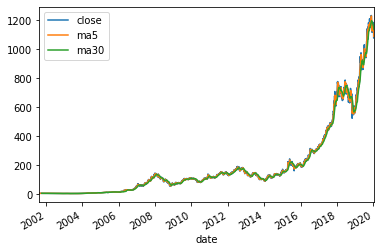

In [10]:
df[['close', 'ma5', 'ma30']].plot()
plt.show()

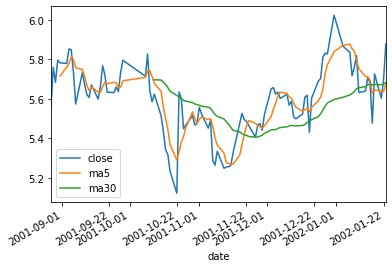

In [11]:
df_ = df[:100]
df_[['close', 'ma5', 'ma30']].plot()
plt.show()

In [12]:
df = df.dropna()

In [13]:
sr1 = df['ma5'] < df['ma30']
sr2 = df['ma5'] >= df['ma30']

death_cross = df[sr1 & sr2.shift(1)].index
golden_cross = df[~(sr1 | sr2.shift(1))].index

In [14]:
death_cross

DatetimeIndex(['2002-01-17', '2002-01-30', '2002-03-29', '2002-07-29',
               '2002-12-27', '2003-03-17', '2003-04-22', '2003-06-20',
               '2003-06-30', '2003-08-04', '2004-02-27', '2004-05-11',
               '2004-06-07', '2004-08-20', '2004-11-23', '2005-04-20',
               '2005-05-16', '2005-06-15', '2005-09-27', '2006-07-10',
               '2006-07-31', '2006-08-24', '2006-09-13', '2007-02-08',
               '2007-04-23', '2007-05-09', '2007-07-12', '2007-09-12',
               '2007-11-12', '2007-11-22', '2008-01-31', '2008-03-18',
               '2008-05-23', '2008-08-12', '2008-12-31', '2009-03-12',
               '2009-04-30', '2009-08-20', '2009-09-02', '2009-10-20',
               '2009-12-18', '2010-01-22', '2010-02-26', '2010-06-23',
               '2010-10-15', '2010-11-02', '2010-12-24', '2011-03-02',
               '2011-03-30', '2011-09-08', '2011-12-08', '2012-07-24',
               '2012-08-02', '2012-08-15', '2012-09-21', '2012-11-07',
      

In [15]:
golden_cross

DatetimeIndex(['2001-11-22', '2002-01-24', '2002-02-04', '2002-06-21',
               '2002-12-05', '2003-01-16', '2003-04-15', '2003-05-30',
               '2003-06-24', '2003-07-14', '2003-10-13', '2004-03-02',
               '2004-06-03', '2004-07-05', '2004-09-14', '2004-12-31',
               '2005-04-26', '2005-06-14', '2005-06-16', '2005-12-28',
               '2006-07-28', '2006-08-22', '2006-08-29', '2006-09-14',
               '2007-04-13', '2007-05-08', '2007-05-22', '2007-07-24',
               '2007-10-09', '2007-11-19', '2007-12-07', '2008-03-05',
               '2008-05-06', '2008-07-16', '2008-11-19', '2009-02-09',
               '2009-04-09', '2009-06-04', '2009-08-25', '2009-09-08',
               '2009-11-12', '2010-01-20', '2010-02-03', '2010-06-04',
               '2010-07-19', '2010-10-22', '2010-11-10', '2011-02-11',
               '2011-03-14', '2011-04-28', '2011-10-25', '2012-02-10',
               '2012-07-25', '2012-08-09', '2012-09-12', '2012-09-27',
      

In [21]:
hold = 0
first_money = 1000
money = first_money

sr1 = pd.Series(1, index = golden_cross)
sr2 = pd.Series(0, index = death_cross)
sr = sr1.append(sr2).sort_index()

for i in range(0, len(sr)):
    p = df['open'][sr.index[i]]
    if sr.iloc[i] == 1:
        buy = (money // (100 * p))
        hold += buy * 100
        money -= buy * 100 * p
    else:
        money += hold * p
        hold = 0

print(hold * df['open'][-1] + money - first_money)

118480.39999999995
